In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import LinAlgError
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures

In [10]:
class LinearRegression:
    
    def __init__(self, learning_rate=0.01, num_of_iterations=1000):
        self._weight = None
        self.learning_rate = learning_rate
        self.num_of_iterations = num_of_iterations
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y):

        try: 
            X_bias = np.c_[X, np.ones(X.shape[0])]
            self._weight = (np.linalg.inv(X_bias.T@X_bias))@X_bias.T@y
            self.intercept_ = self._weight[-1]
            self.coef_ = self._weight[:-1]
        
        except LinAlgError:
            print("LinAlgError: X is not an ivertible matrix.")
        

        
    def predict(self, X):
        X_bias = np.c_[X, np.ones(X.shape[0])]
        return X_bias @ self._weight

    
    def score(self, X, y):
        y_true  = y
        y_pred = self.predict(X)

        sst = np.sum((y_true - y_true.mean())**2)
        ssr = np.sum((y_pred - y_true)**2)
        sse = sst - ssr
        r_squared = 1 - ssr / sst
        return r_squared
    
    
    def weight_vector_print(self):
        print("The weight vector: ", [round(x,3) for x in self._weight])
       
    def coef_intercept_print(self):
        print(self.coef_[0], self.intercept_)
    
    def plot_it(self, X, y):
        _, ax = plt.subplots(1,2, figsize=(12,4))
        
        ax[0].scatter(X, y)
        ax[1].scatter(X, y)
        
        x = np.linspace(0, 5, 20)

        ax[0].plot(x, self.coef_[0]*x + self.intercept_, 'g', label='Linear Regression')
        
        ax[0].plot(x, 2*x + 1, 'r:', label='Reference Line')
        ax[1].plot(x, 2*x + 1, 'r:', label='Reference Line')
            
        ax[1].plot(x, self._weight[0]*x + self._weight[1], 'b', label='Reference Line')
        
        plt.legend()
        plt.show()

In [14]:
def shuffle_and_split(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=40)

def dataframe_shuffle(df):
    return df.sample(frac=1).reset_index(drop=True)


#### main 1:

In [15]:
def main1():
    df = pd.read_csv("simple_regression.csv")

    df1 = dataframe_shuffle(df)

    X = df1['x']
    y = df1['y']

    linear_regression = LinearRegression()

    X_train, X_test, y_train, y_test = shuffle_and_split(X,y)

    linear_regression.fit(X_train, y_train)

    linear_regression_score = linear_regression.score(X_test, y_test)

    linear_regression.weight_vector_print()
    print("the score is: ", round(linear_regression_score,3))
    
main1()

The weight vector:  [1.54, 10.034]
the score is:  0.992


#### main 2:

In [17]:
def main2():
    housing = fetch_california_housing()
    X = housing.data
    y = housing.target
    linear_regression = LinearRegression()
    X_train, X_test, y_train, y_test = shuffle_and_split(X,y)
    linear_regression.fit(X_train, y_train)
    linear_regression.weight_vector_print()
    linear_regression_score = linear_regression.score(X_test, y_test)
    print("the score is: ", round(linear_regression_score,3))

main2()

The weight vector:  [0.43, 0.009, -0.099, 0.596, -0.0, -0.005, -0.421, -0.434, -36.843]
the score is:  0.608


#### main3: 

In [18]:
def find_optimal_polynomial_degree(X, y):

    optimal_linear_regression = None
    best_degree = None
    best_score = 0

    scores = []
    
    for degree in range(1, 5):
        
        linear_regression = LinearRegression()

        poly = PolynomialFeatures(degree, include_bias=False)
        Z = poly.fit_transform(X)
        
        X_train, X_test, y_train, y_test = shuffle_and_split(Z, y)
        linear_regression.fit(X_train, y_train)
        
        score = linear_regression.score(X_test, y_test)
        scores.append(1 - score)
                
        if score > best_score:
            optimal_linear_regression = linear_regression
            best_degree = degree
            best_score = score
        
    plt.plot(range(1, 5), scores, marker='o')
    plt.ylabel("Score")
    plt.xlabel("Polynomial Degree")
    plt.title("Polynomial Degree vs Score")
    plt.grid()
    plt.show()
    return best_degree, optimal_linear_regression, best_score


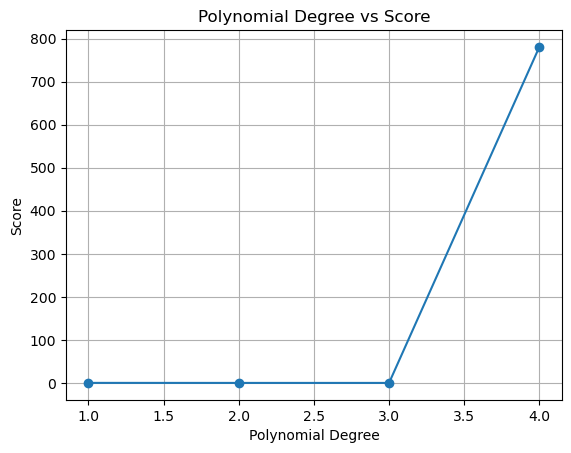

The optimal degree: 2
The weight vector:  [0.491, 0.004, -54.249, 2.078, 0.005, -0.0, -1.024, -0.028, -0.0, 0.997, -0.0, 80.849, 1.773, -0.126, -1.935]
The best score: 0.999


In [19]:
def main3():
    df = pd.read_csv("Students_on_Mars.csv")
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    best_degree, linear_regression, best_score = find_optimal_polynomial_degree(X, y)

    print("The optimal degree:", best_degree)
    linear_regression.weight_vector_print()
    print("The best score:", round(best_score,3))
    
main3()